In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Kruskal's Algorithm for Computing the Minimum Spanning Tree

In our implementation of **Kruskal's algorithm** for finding the *minimum spanning tree* we use the *union-find* data structure that we have defined previously.

In [2]:
import union_find_oo as uf

Furthermore, we need a priority queue.

In [3]:
import heapq as hq

The function $\texttt{mst}(V, E)$ takes a set of nodes $V$ and a set of weighted edges $E$ to compute a minimum spanning tree.  It is assumed that the pair $(V, E)$ represents a weighted graph $G$ that is **connected**.  The weighted edges in the set $E$ have the form
$$ \bigl(w, (x, y)\bigr).  $$
Here, $x$ and $y$ are nodes from the set $V$, while $w$ is the cost of the edge $\{x,y\}$.
The algorithm returns a set of weighted edges that define a minimum spanning tree of $G$.

In [4]:
def mst(V, E):
    UF  = uf.UnionFind(V)
    MST = set()         # minimum spaning tree
    H   = []            # empty priority queue for weighted edges
    for edge in E:
        hq.heappush(H, edge)
    while True:
        w, (x, y) = hq.heappop(H)
        print(f'testing {x} - {y}, weight {w}')
        root_x = UF.find(x)
        root_y = UF.find(y)
        if root_x != root_y:
            print(f'connect {x} - {y}')
            MST.add((w, (x, y)))
            UF.union(x, y)
            display(toDot(E, MST))
            print('_' * 100)
            if len(MST) == len(V) - 1:
                return MST

In [5]:
import graphviz as gv

Given a set $E$ of weighted edges, the function $\texttt{toDot}$ transforms this set into a dot structure that can be displayed as a graph.  The edges that are present in the set $H$ are assumed to be the edges that are part of the minimum spanning tree and therefore are highlighted.

In [6]:
def toDot(E, H):
    V = set()
    for (_, (x, y)) in E:
        V.add(x)
        V.add(y)
    dot = gv.Graph()
    dot.attr(rankdir='LR', size='8,5')
    for x in V:
        dot.node(str(x))
    for (w, (x, y)) in E:
        if (w, (x, y)) in H:
            dot.edge(str(x), str(y), label=str(w), color='blue', penwidth='2')
        else:
            dot.edge(str(x), str(y), label=str(w), style='dashed')
    return dot

In [7]:
def demoFile(fn):
    with open(fn, 'r') as file:
        data = file.readlines()
    Edges = set()
    Nodes = set()
    for line in data:
        x, y, weight = line.split()
        Edges.add( (int(weight), (int(x), int(y))) )
        Nodes.add( int(x) )
        Nodes.add( int(y) )
    MST = mst(Nodes, Edges);
    print(MST)
    return toDot(Edges, MST)

testing 0 - 7, weight 1
connect 0 - 7


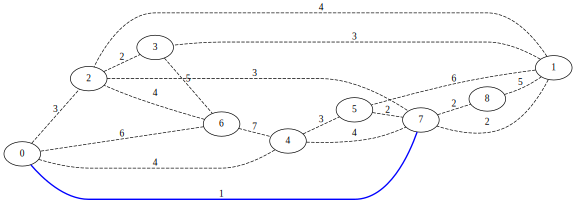

____________________________________________________________________________________________________
testing 1 - 7, weight 2
connect 1 - 7


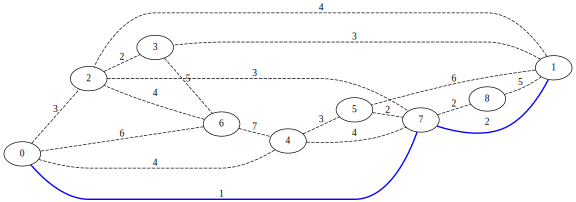

____________________________________________________________________________________________________
testing 2 - 3, weight 2
connect 2 - 3


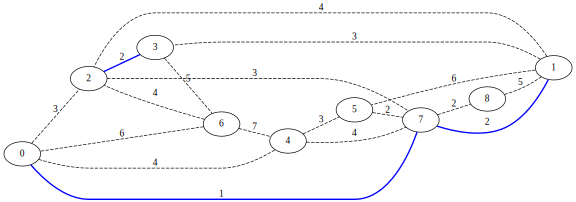

____________________________________________________________________________________________________
testing 5 - 7, weight 2
connect 5 - 7


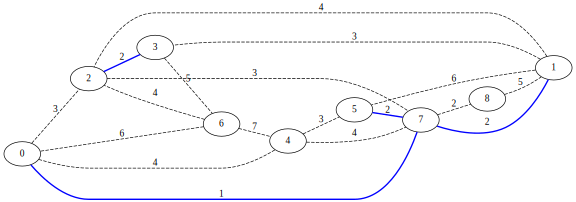

____________________________________________________________________________________________________
testing 7 - 8, weight 2
connect 7 - 8


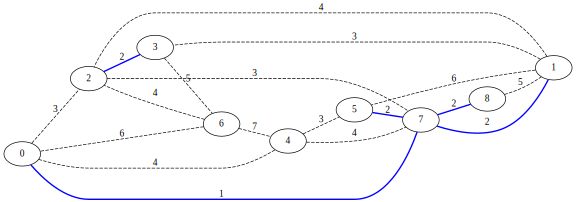

____________________________________________________________________________________________________
testing 0 - 2, weight 3
connect 0 - 2


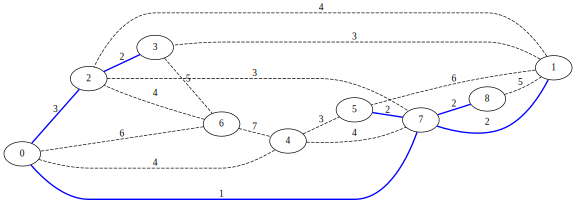

____________________________________________________________________________________________________
testing 1 - 3, weight 3
testing 2 - 7, weight 3
testing 4 - 5, weight 3
connect 4 - 5


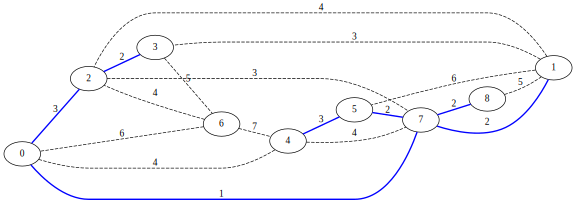

____________________________________________________________________________________________________
testing 0 - 4, weight 4
testing 1 - 2, weight 4
testing 4 - 7, weight 4
testing 6 - 2, weight 4
connect 6 - 2


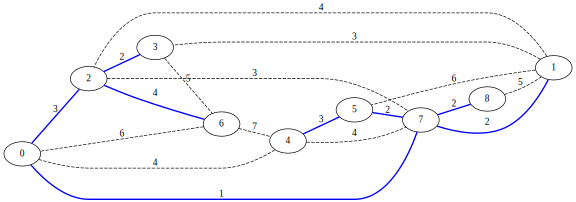

____________________________________________________________________________________________________
{(2, (7, 8)), (4, (6, 2)), (1, (0, 7)), (2, (2, 3)), (2, (5, 7)), (2, (1, 7)), (3, (4, 5)), (3, (0, 2))}


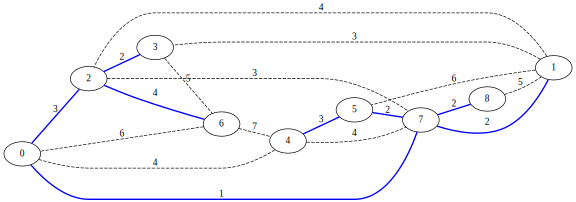

In [8]:
MST = demoFile("tiny.txt")
MST